# Homework 1: A little review

## Due Date: Tuesday, October 7th, 11:59PM

Welcome to the first homework of 311! All homeworks will be due by 11:59pm on the Monday following their assignment. The objective with this assignment is to refresh some concepts and practices from DSCI101/102**

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** below.

Collaborators: *list collaborators here*

## Grading

Grading is broken down into autograded answers and free response. 

For autograded answers, the results of your code are compared to provided and/or hidden tests. For most homeworks, the autograder will **only tell you whether your response is potentially correct** *i.e.* within a realistic range of values or of the correct value type. This is to help you avoid any unintended obvious errors, but won't tell you if your answer is correct.

For free response, readers will evaluate how well you answered the question and/or fulfilled the requirements of the question. Now that you're in upper-divisional core coursework, there will be many more of these. 

For plots, make sure to be as descriptive as possible: include titles, axes labels, and units wherever applicable.

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** below.

**Collaborators, if any**:

In [3]:
# Standard imports
import numpy as np
import pandas as pd

# %matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import seaborn as sns

path = 'https://github.com/oregon-data-science/DSCI101/raw/main/data/'

# Initialize Otter
import otter
grader = otter.Notebook()

On to the review then.

## p-values

### <font color='blue'>Run the next cell</font>

Define the following functions. You will use `fitted_value` for question 2.9

In [6]:
def standard_units(numbers):
    ''' Given numbers array return z_array in standard units'''
    z_array = (numbers - np.mean(numbers)) / np.std(numbers)
    return z_array

def correlation(table, label_x, label_y):
    ''' Returns r, correlation of the 2 arrays  '''
    r = np.mean(standard_units(table[label_x]) * 
                standard_units(table[label_y]))
    return r

def slope(table, label_x, label_y):
    ''' Return slope of correlation line in original units'''
    r = correlation(table, label_x, label_y)
    return r * np.std(table[label_y]) / np.std(table[label_x])

def intercept(table, label_x, label_y):
    ''' return the y intercept in original units'''
    b = (np.mean(table[label_y]) - 
         slope(table, label_x, label_y) * np.mean(table[label_x]))
    return b

def fitted_value(table, label_x, label_y, given_x):
    ''' Fit given_x (a specific x value), predicts the specific y value'''
    m = slope(table, label_x, label_y)
    b = intercept(table, label_x, label_y)
    predicted_y = m * given_x + b    
    return predicted_y

'functions defined'

'functions defined'

<img src='https://github.com/oregon-data-science/DSCI101/raw/main/images/640px-American_roulette_wheel_layout.png' width='250'>

Roulette wheels like the one above have 38 places the roulette ball may land in:  
2 green, or   
18 red, or   
18 black places.
    
With many rolls, you would expect to get red about 18 times out of every 38 rolls.

You need to determine if a wheel that was rolled 100 times and resulted in red 61 times is a fair wheel.

### Section 1

What is the **"null hypothesis**" regarding the roulette wheel in this case? 

**Your response**: The null hypothesis is that the wheel is fair. This would mean the probability of getting red would be 18/38 or around 0.47

#### Question 1.2

Create a model_proportions array that you can use with the **sample_proportions** function to bet red on the roulette wheel **100 times**.

In [14]:
red = 18
black = 18
green = 2
total = 38

# Create model_proportions as a numpy array
model_proportions = np.array([red/total, black/total, green/total])
model_proportions

array([0.47368421, 0.47368421, 0.05263158])

In [16]:
grader.check("q1_2")

q1_2 results: All test cases passed!

The observed number of reds in 100 spins (61) is higher than the expected proportion. Might this be due to chance, or do we think we're playing with an unfair wheel? Let's perform a simulation. Simulate 1000 repetitions of 100 spins of the roulette wheel assuming the null hypothesis, determine the proportion of reds in each 100-spin sample, then compute the corresponding p-value. You will define two functions to do so: `sample_proportions` and `play_roulette`.

#### Question 1.3

You may remember the function `sample_proportions` from the `datascience` package in 101/102. Because we've moved on from that package, you will now define the function yourself. Your function should take two arguments: an array of proportions (as in the form of `model_proportions`), and the number of random samples (roulette rolls) to take from the provided proportions. It should return an array of the estimated proportions of each color based on your sampling. 

*hint:* There are a few different ways you can create this function, but it might be helpful to use the function `np.random.choice`. You can look at its help file for usage examples. 

In [20]:
# Define sample_proportions
def sample_proportions(proportions, spins):
    colors = np.arange(len(proportions))
    
    rolls = np.random.choice(colors, size=spins, p=proportions)

    counts = np.bincount(rolls, minlength=len(proportions))
    
    estimated_props = counts / spins
    
    return estimated_props

In [30]:
sample_proportions(model_proportions, 100)

array([0.48, 0.51, 0.01])

In [32]:
grader.check("q1_3")

q1_3 results: All test cases passed!

#### Question 1.4

Now define `play_roulette`. Your function should take one argument: the number of repetitions in our simulation. It should return an array of sampled red proportions of length equal to the number of repetitions. Use `model_proportions` in your function.

In [35]:
# Define this function
def play_roulette(repetitions):
    
    r_proportions = np.zeros(repetitions)
    for i in range(repetitions):
        sample = sample_proportions(model_proportions, 100)
        r_proportions[i] = sample[0]
    return r_proportions

simulated_reds = play_roulette(1000);

In [37]:
grader.check("q1_4")

q1_4 results: All test cases passed!

#### Question 1.5

Determine the **proportion** of times the number of simulated reds was greater than the observed reds. 

In [40]:
# Compute the p_value given an observed value
observed_reds = 61/100

prop_red_greater = np.mean(simulated_reds > observed_reds)
prop_red_greater

0.005

What does this proportion mean with respect to our hypotheses? Based on your answer, would you reject the null hypothesis?

**Your response:** My responses are in the range of 0.002-0.005 which are all < 0.5 (the traditional significance level), so I would reject the null hypothesis. This means that the wheel is NOT fair

In [43]:
reject_null = True

In [45]:
grader.check("q1_5")

q1_5 results: All test cases passed!

### Section 2

The next series of questions will test your conceptual understanding of some of the most important topics covered in the 101/102 series. 

#### Question 2.1

We wish to evaluate the effect of maternal smoking habit on the birth weight of newborns. 

In [50]:
baby = pd.read_table(path+'baby.csv', sep = ",")[["Birth Weight", "Maternal Smoker"]]
baby.head(3)

,Birth Weight,Maternal Smoker
0,120,False
1,113,False
2,128,True


As a first step, we shuffle the smoker column with respect to maternal birth weight. Why? Assign your selection to `q2_1` below. 

1) This is one step in splitting the data into train/test sets

2) This lets us simulate the test statistic under the null hypothesis. 

3) Maternal smoking habit is a confounding variable we wish to control for. 

In [53]:
q2_1 = 2

In [55]:
grader.check("q2_1")

q2_1 results: All test cases passed!

#### Question 2.2

You are a summer intern with a group that has some donor funding. They spent $10,000 to gather data from a **representative random sample of 500** responses from the local community. Problem: the **standard deviation of the data is far too large** to confidently describe the local community.

They would like to reduce the standard deviation to **about one third** of what it is now. They hope that for a total cost of $30,000 they can get a total of 1500 responses.

How will tripling your sample size affect your standard deviation? What would you recommend to your donors based on your answer? Feel free to use code to help you answer this question. 

**Your response:** Tripling the sample size will reduce the standard deviation by 1/√3. This is approximately 0.57 and means that tripling the sample size will only reduce the standard deviation to around 1/2, rather than to 1/3, of what it currently is. My recommendation would be to find ways to increase the budget, or to optimize the forecasted budget to get more repsonses than 1500. If the budget stays at $30,000, then 4500 responses are needed to reduce the standard deviation to 1/3. But if there are ways to increase the budget slightly and increase the amount of responses at a larger amount, then that may allow it to be possible to cut the standard deviation to 1/3 of what it is now.

#### Question 2.3

We have data and wish to train a predictive model by splitting it into 2 parts (training and testing). We take the first 90 rows of data as training, the rest as testing.

Are there any problems with this approach? If so, what would you recommend?

**Your response:** Yes, taking the first 90 rows of data can lead to problems in training a predicitive model. The ordering and lack of randomness may create bias in how the model is trained. If the first 90 rows ordered in some way (such as time, place, demographic, etc), then the training set will train the predicitive model in a way that will reflect this bias and may not match up to the testing set. I would suggest randomly splitting up the data by shuffling first.

#### Question 2.4

You and your lab partner are working with data from several columns. You want to predict some response variable and have two distinct linear models, one for each predictor. What is most appropriate way to compare the fit of the two models? Assign your answer to `q2_4` below.

1) Compute the sum of the residuals to compare the two models

2) Visually assess the fit of the two lines to the data

3) Compute mean squared error to compare the two models

In [62]:
q2_4 = 3

In [64]:
grader.check("q2_4")

q2_4 results: All test cases passed!

#### Question 2.5

Which of the following is true about the **Central Limit Theorem**? There is only one correct answer. Assign your answer to q2_5 below. 

1) Given a large enough sample size, any variable will become approximately normally distributed. 

2) Given a large enough sample size, the estimated mean of a population will be drawn from an approximately normal distribution. 

3) Confidence in a sample statistic can only be estimated from normally distributed variables.

In [67]:
q2_5 = 2

In [69]:
grader.check("q2_5")

q2_5 results: All test cases passed!

#### Question 2.6

A 2022 review of COVID rapid tests in Europe reported an approximate 10% false positive rate, and a 20% false negative rate. 1000 individuals with COVID-like symptoms, 300 of whom actually have COVID, test themselves. Would we expect that there will be more people without COVID that test positive, or more people that have COVID but test negative. Assign your answer to q2_6 below. 

1) More people without COVID that test positive

2) More people with COVID that test negative

In [72]:
q2_6 = 1

In [74]:
grader.check("q2_6")

q2_6 results: All test cases passed!

#### Question 2.7

Underdiagnosis of a medical condition is when the majority of individuals in a population with a condition aren't diagnosed with the condition.

Overdiagnosis is when the majority of those diagnosed with a condition shouldn't have been diagnosed with the condition. 

In the adult population in the U.S., it is estimated that ~3% of individuals have ADHD. Let's assume that 60% of invididuals with ADHD decide to get evaluated, while 10% without ADHD think they may have the condition and also decide to get evaluated. The evaluation process is variable and prone to error. On average, ADHD evaluation has a 20% false negative rate and a 20% false positive rate. These approximate estimates come from a [meta-analysis on adult ADHD assessment](https://www.sciencedirect.com/science/article/pii/S0891422210003264?casa_token=4X4o0NmEjf0AAAAA:fTcQ4VkVh1Oz5Ze73HG5ljGac9Aiyz2rrI8hS9U27PTty9Q7DcdOMbqyNOSgX4dljNU_QDiwqDU#bib0010) (a meta-analysis is a study of studies). 

Is ADHD in the adult population underdiagnosed, overdiagnosed, or both? Explain.

**Your response:** Underdiagnosis can be viewed as a false negative and overdiagnosis can be viewed as a false positive. If 0.03 of the US population has ADHD, that means 0.97 do not have ADHD. If 60% of those with ADHD get evaluated, then that is 0.018. 20% of these will be a false negative (0.0036) and 80% will be a true positive (0.0144). If 10% of those without ADHD get evaluted, then that is 0.097. 20% of these will be false positives (0.0194) and 80% will be a true negative (0.0776). Therefore, those that will get diagnosed with ADHD will be true positives + false positives: 0.0144 + 0.0194 = 0.0338. Those that have ADHD but aren't diagnosed will be those not evaluated + false negatives: (0.03 - 0.018) + 0.0036 = 0.0156. More than half of those who are diagnosed with ADHD (0.0194 / 0.0338 ≈ 57%) do not actually have ADHD. That means that ADHD is both underdiagnosed and overdiagnosed.

#### Question 2.8

Read in the following table.

In [79]:
dugongs = pd.read_table(path + 'dugongs.csv', sep = ",")
dugongs.head(3)

,Age,Length
0,1.0,1.80
1,1.5,1.85
2,1.5,1.87


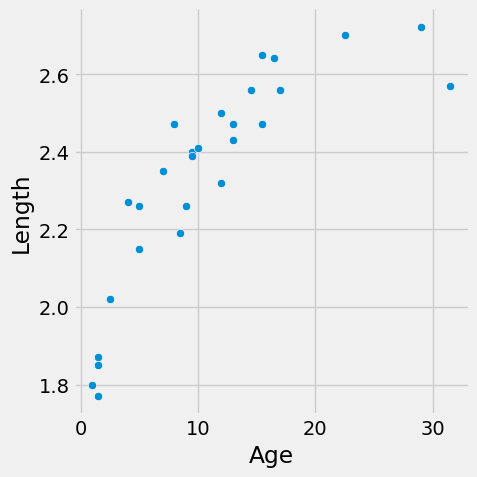

In [83]:
# Visualize the relationship between dugong length and their age
sns.relplot(data = dugongs, x = "Age", y = "Length");

Using `fitted_values()` defined above, predict the length of a dugong of that's 7 years old. Do the same for a dugong 50 years old.  

In [105]:
dugong_7 = fitted_value(dugongs, "Age", "Length", 7)
dugong_50 = fitted_value(dugongs, "Age", "Length", 50)
dugong_7, dugong_50

(2.220972811648208, 3.466048545699204)

In [103]:
grader.check("q2_8")

q2_8 results: All test cases passed!

#### Question 2.9

Based on visual assessment of the relationship between dugong age and length, do you think the estimate for a 7-year old dugong is a good one. What about the estimate for a 50-year old dugong? Explain your answer to each below. 

**Your response**: I think that the estimate for a 7-year old is good. It falls within the general cloud of points on the graph. However, the estimate for a 50 year old doesn't seem realistic. The graph starts steep, but seems to flatten out at older ages. This also makes sense with what we know about age and height. This would mean that the prediction for a 50 year old is too high.

## Submission

Make sure you have run all cells in your notebook in order. Then execute the following two commands from the File menu:

* Save and Checkpoint
* Close and Halt

Then upload your .ipynb file to Canvas assignment HW1